In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import multigrate as mtg
import scanpy as sc
import numpy as np
import pandas as pd

Global seed set to 0


In [2]:
sc.set_figure_params(dpi_save=300)

In [3]:
rna = sc.read('../../../data/10xpbmc10k-2020/expressions_hvg.h5ad')
rna

AnnData object with n_obs × n_vars = 10000 × 4000
    obs: 'cell_type'
    layers: 'count'

In [4]:
atac = sc.read('../../../data/10xpbmc10k-2020/peaks.h5ad')
atac

AnnData object with n_obs × n_vars = 10000 × 40086
    obs: 'cell_type'
    layers: 'binary', 'cpm_norm', 'tf-idf'

In [5]:
adata = mtg.data.organize_multiome_anndatas(
    adatas = [[rna], [atac]],
    groups = [[0], [0]],
    layers = [['count'], ['cpm_norm']],
    modality_lengths=[4000, 40086],
)
adata

AnnData object with n_obs × n_vars = 10000 × 44086
    obs: 'cell_type', 'group'
    layers: 'count', 'binary', 'cpm_norm', 'tf-idf'

In [6]:
mtg.model.MultiVAE.setup_anndata(
    adata,
    rna_indices_end=4000,
)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 10000 cells, 44086 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 1 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [7]:
model = mtg.model.MultiVAE(
    adata, 
    modality_lengths=[4000, 40086],
    losses=['nb', 'mse'],
    loss_coefs={'kl': 1e-5,
               'integ': 0,
               },
    z_dim=16,
    cond_dim=16,
    dropout=0.2,
    n_layers_encoders=[2, 2],
    n_layers_decoders=[2, 2],
)

In [8]:
model.train(max_epochs=200, lr=1e-3, batch_size=256)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 1/200:   0%|          | 1/200 [00:11<37:41, 11.36s/it, loss=7.4e+03, v_num=1]

Metric elbo_validation improved. New best score: 5963.251


Epoch 2/200:   1%|          | 2/200 [00:13<20:03,  6.08s/it, loss=6.32e+03, v_num=1]

Metric elbo_validation improved by 237.829 >= min_delta = 0.0. New best score: 5725.422


Epoch 3/200:   2%|▏         | 3/200 [00:15<14:11,  4.32s/it, loss=6.13e+03, v_num=1]

Metric elbo_validation improved by 26.207 >= min_delta = 0.0. New best score: 5699.215


Epoch 4/200:   2%|▏         | 4/200 [00:18<11:25,  3.50s/it, loss=6.02e+03, v_num=1]

Metric elbo_validation improved by 7.613 >= min_delta = 0.0. New best score: 5691.602


Epoch 5/200:   2%|▎         | 5/200 [00:20<09:52,  3.04s/it, loss=5.94e+03, v_num=1]

Metric elbo_validation improved by 5.573 >= min_delta = 0.0. New best score: 5686.029


Epoch 6/200:   3%|▎         | 6/200 [00:22<09:08,  2.83s/it, loss=5.9e+03, v_num=1] 

Metric elbo_validation improved by 2.276 >= min_delta = 0.0. New best score: 5683.752


Epoch 7/200:   4%|▎         | 7/200 [00:25<08:30,  2.65s/it, loss=5.85e+03, v_num=1]

Metric elbo_validation improved by 2.066 >= min_delta = 0.0. New best score: 5681.686


Epoch 8/200:   4%|▍         | 8/200 [00:27<08:01,  2.51s/it, loss=5.82e+03, v_num=1]

Metric elbo_validation improved by 1.222 >= min_delta = 0.0. New best score: 5680.464


Epoch 9/200:   4%|▍         | 9/200 [00:29<07:41,  2.41s/it, loss=5.79e+03, v_num=1]

Metric elbo_validation improved by 0.691 >= min_delta = 0.0. New best score: 5679.773


Epoch 11/200:   6%|▌         | 11/200 [00:34<07:17,  2.32s/it, loss=5.73e+03, v_num=1]

Metric elbo_validation improved by 1.536 >= min_delta = 0.0. New best score: 5678.237


Epoch 12/200:   6%|▌         | 12/200 [00:36<07:09,  2.28s/it, loss=5.71e+03, v_num=1]

Metric elbo_validation improved by 1.981 >= min_delta = 0.0. New best score: 5676.256


Epoch 13/200:   6%|▋         | 13/200 [00:38<07:04,  2.27s/it, loss=5.72e+03, v_num=1]

Metric elbo_validation improved by 3.887 >= min_delta = 0.0. New best score: 5672.369


Epoch 14/200:   7%|▋         | 14/200 [00:40<07:07,  2.30s/it, loss=5.72e+03, v_num=1]

Metric elbo_validation improved by 11.126 >= min_delta = 0.0. New best score: 5661.242


Epoch 15/200:   8%|▊         | 15/200 [00:43<07:02,  2.28s/it, loss=5.68e+03, v_num=1]

Metric elbo_validation improved by 70.494 >= min_delta = 0.0. New best score: 5590.749


Epoch 16/200:   8%|▊         | 16/200 [00:45<06:57,  2.27s/it, loss=5.57e+03, v_num=1]

Metric elbo_validation improved by 122.828 >= min_delta = 0.0. New best score: 5467.921


Epoch 17/200:   8%|▊         | 17/200 [00:47<06:53,  2.26s/it, loss=5.53e+03, v_num=1]

Metric elbo_validation improved by 10.827 >= min_delta = 0.0. New best score: 5457.094


Epoch 18/200:   9%|▉         | 18/200 [00:49<06:48,  2.25s/it, loss=5.51e+03, v_num=1]

Metric elbo_validation improved by 1.821 >= min_delta = 0.0. New best score: 5455.273


Epoch 19/200:  10%|▉         | 19/200 [00:52<06:46,  2.24s/it, loss=5.49e+03, v_num=1]

Metric elbo_validation improved by 4.133 >= min_delta = 0.0. New best score: 5451.140


Epoch 20/200:  10%|█         | 20/200 [00:54<06:42,  2.24s/it, loss=5.5e+03, v_num=1] 

Metric elbo_validation improved by 3.488 >= min_delta = 0.0. New best score: 5447.652


Epoch 21/200:  10%|█         | 21/200 [00:56<06:39,  2.23s/it, loss=5.49e+03, v_num=1]

Metric elbo_validation improved by 4.586 >= min_delta = 0.0. New best score: 5443.066


Epoch 22/200:  11%|█         | 22/200 [00:58<06:37,  2.23s/it, loss=5.46e+03, v_num=1]

Metric elbo_validation improved by 6.203 >= min_delta = 0.0. New best score: 5436.864


Epoch 23/200:  12%|█▏        | 23/200 [01:00<06:34,  2.23s/it, loss=5.47e+03, v_num=1]

Metric elbo_validation improved by 4.226 >= min_delta = 0.0. New best score: 5432.638


Epoch 24/200:  12%|█▏        | 24/200 [01:03<06:31,  2.22s/it, loss=5.46e+03, v_num=1]

Metric elbo_validation improved by 4.994 >= min_delta = 0.0. New best score: 5427.644


Epoch 25/200:  12%|█▎        | 25/200 [01:05<06:30,  2.23s/it, loss=5.45e+03, v_num=1]

Metric elbo_validation improved by 2.409 >= min_delta = 0.0. New best score: 5425.235


Epoch 26/200:  13%|█▎        | 26/200 [01:07<06:28,  2.23s/it, loss=5.45e+03, v_num=1]

Metric elbo_validation improved by 4.176 >= min_delta = 0.0. New best score: 5421.060


Epoch 27/200:  14%|█▎        | 27/200 [01:09<06:24,  2.22s/it, loss=5.45e+03, v_num=1]

Metric elbo_validation improved by 5.703 >= min_delta = 0.0. New best score: 5415.356


Epoch 28/200:  14%|█▍        | 28/200 [01:12<06:21,  2.22s/it, loss=5.42e+03, v_num=1]

Metric elbo_validation improved by 5.195 >= min_delta = 0.0. New best score: 5410.161


Epoch 29/200:  14%|█▍        | 29/200 [01:14<06:19,  2.22s/it, loss=5.43e+03, v_num=1]

Metric elbo_validation improved by 5.187 >= min_delta = 0.0. New best score: 5404.975


Epoch 30/200:  15%|█▌        | 30/200 [01:16<06:16,  2.22s/it, loss=5.42e+03, v_num=1]

Metric elbo_validation improved by 4.863 >= min_delta = 0.0. New best score: 5400.111


Epoch 31/200:  16%|█▌        | 31/200 [01:18<06:16,  2.23s/it, loss=5.42e+03, v_num=1]

Metric elbo_validation improved by 6.277 >= min_delta = 0.0. New best score: 5393.834


Epoch 32/200:  16%|█▌        | 32/200 [01:20<06:14,  2.23s/it, loss=5.42e+03, v_num=1]

Metric elbo_validation improved by 4.042 >= min_delta = 0.0. New best score: 5389.792


Epoch 33/200:  16%|█▋        | 33/200 [01:23<06:11,  2.23s/it, loss=5.41e+03, v_num=1]

Metric elbo_validation improved by 3.794 >= min_delta = 0.0. New best score: 5385.998


Epoch 34/200:  17%|█▋        | 34/200 [01:25<06:09,  2.23s/it, loss=5.42e+03, v_num=1]

Metric elbo_validation improved by 1.768 >= min_delta = 0.0. New best score: 5384.230


Epoch 35/200:  18%|█▊        | 35/200 [01:27<06:07,  2.23s/it, loss=5.42e+03, v_num=1]

Metric elbo_validation improved by 1.775 >= min_delta = 0.0. New best score: 5382.455


Epoch 36/200:  18%|█▊        | 36/200 [01:29<06:04,  2.22s/it, loss=5.4e+03, v_num=1] 

Metric elbo_validation improved by 3.824 >= min_delta = 0.0. New best score: 5378.631


Epoch 37/200:  18%|█▊        | 37/200 [01:32<06:03,  2.23s/it, loss=5.41e+03, v_num=1]

Metric elbo_validation improved by 4.335 >= min_delta = 0.0. New best score: 5374.296


Epoch 38/200:  19%|█▉        | 38/200 [01:34<06:01,  2.23s/it, loss=5.39e+03, v_num=1]

Metric elbo_validation improved by 3.167 >= min_delta = 0.0. New best score: 5371.128


Epoch 39/200:  20%|█▉        | 39/200 [01:36<05:58,  2.23s/it, loss=5.39e+03, v_num=1]

Metric elbo_validation improved by 2.125 >= min_delta = 0.0. New best score: 5369.003


Epoch 40/200:  20%|██        | 40/200 [01:38<05:57,  2.23s/it, loss=5.4e+03, v_num=1] 

Metric elbo_validation improved by 1.393 >= min_delta = 0.0. New best score: 5367.610


Epoch 41/200:  20%|██        | 41/200 [01:41<05:55,  2.24s/it, loss=5.38e+03, v_num=1]

Metric elbo_validation improved by 1.812 >= min_delta = 0.0. New best score: 5365.798


Epoch 42/200:  21%|██        | 42/200 [01:43<05:52,  2.23s/it, loss=5.38e+03, v_num=1]

Metric elbo_validation improved by 3.173 >= min_delta = 0.0. New best score: 5362.625


Epoch 43/200:  22%|██▏       | 43/200 [01:45<05:49,  2.23s/it, loss=5.38e+03, v_num=1]

Metric elbo_validation improved by 3.553 >= min_delta = 0.0. New best score: 5359.072


Epoch 44/200:  22%|██▏       | 44/200 [01:47<06:01,  2.32s/it, loss=5.37e+03, v_num=1]

Metric elbo_validation improved by 2.573 >= min_delta = 0.0. New best score: 5356.499


Epoch 45/200:  22%|██▎       | 45/200 [01:50<05:56,  2.30s/it, loss=5.38e+03, v_num=1]

Metric elbo_validation improved by 1.548 >= min_delta = 0.0. New best score: 5354.951


Epoch 46/200:  23%|██▎       | 46/200 [01:52<05:51,  2.28s/it, loss=5.37e+03, v_num=1]

Metric elbo_validation improved by 2.022 >= min_delta = 0.0. New best score: 5352.929


Epoch 47/200:  24%|██▎       | 47/200 [01:54<05:50,  2.29s/it, loss=5.35e+03, v_num=1]

Metric elbo_validation improved by 2.348 >= min_delta = 0.0. New best score: 5350.581


Epoch 48/200:  24%|██▍       | 48/200 [01:57<05:54,  2.33s/it, loss=5.37e+03, v_num=1]

Metric elbo_validation improved by 4.261 >= min_delta = 0.0. New best score: 5346.320


Epoch 50/200:  25%|██▌       | 50/200 [02:02<05:57,  2.38s/it, loss=5.36e+03, v_num=1]

Metric elbo_validation improved by 1.437 >= min_delta = 0.0. New best score: 5344.883


Epoch 52/200:  26%|██▌       | 52/200 [02:06<05:55,  2.40s/it, loss=5.35e+03, v_num=1]

Metric elbo_validation improved by 1.872 >= min_delta = 0.0. New best score: 5343.011


Epoch 53/200:  26%|██▋       | 53/200 [02:09<05:53,  2.40s/it, loss=5.35e+03, v_num=1]

Metric elbo_validation improved by 3.142 >= min_delta = 0.0. New best score: 5339.870


Epoch 54/200:  27%|██▋       | 54/200 [02:11<05:51,  2.41s/it, loss=5.34e+03, v_num=1]

Metric elbo_validation improved by 2.661 >= min_delta = 0.0. New best score: 5337.209


Epoch 55/200:  28%|██▊       | 55/200 [02:14<05:51,  2.43s/it, loss=5.33e+03, v_num=1]

Metric elbo_validation improved by 1.472 >= min_delta = 0.0. New best score: 5335.737


Epoch 56/200:  28%|██▊       | 56/200 [02:17<06:05,  2.54s/it, loss=5.35e+03, v_num=1]

Metric elbo_validation improved by 2.396 >= min_delta = 0.0. New best score: 5333.341


Epoch 59/200:  30%|██▉       | 59/200 [02:24<05:54,  2.51s/it, loss=5.34e+03, v_num=1]

Metric elbo_validation improved by 1.817 >= min_delta = 0.0. New best score: 5331.524


Epoch 60/200:  30%|███       | 60/200 [02:27<05:48,  2.49s/it, loss=5.32e+03, v_num=1]

Metric elbo_validation improved by 0.782 >= min_delta = 0.0. New best score: 5330.742


Epoch 63/200:  32%|███▏      | 63/200 [02:34<05:35,  2.45s/it, loss=5.34e+03, v_num=1]

Metric elbo_validation improved by 4.233 >= min_delta = 0.0. New best score: 5326.509


Epoch 66/200:  33%|███▎      | 66/200 [02:41<05:17,  2.37s/it, loss=5.32e+03, v_num=1]

Metric elbo_validation improved by 1.226 >= min_delta = 0.0. New best score: 5325.283


Epoch 68/200:  34%|███▍      | 68/200 [02:45<05:05,  2.32s/it, loss=5.33e+03, v_num=1]

Metric elbo_validation improved by 0.166 >= min_delta = 0.0. New best score: 5325.117


Epoch 73/200:  36%|███▋      | 73/200 [02:57<04:52,  2.30s/it, loss=5.3e+03, v_num=1] 

Metric elbo_validation improved by 1.931 >= min_delta = 0.0. New best score: 5323.186


Epoch 82/200:  41%|████      | 82/200 [03:18<04:35,  2.33s/it, loss=5.32e+03, v_num=1]

Metric elbo_validation improved by 0.052 >= min_delta = 0.0. New best score: 5323.133


Epoch 84/200:  42%|████▏     | 84/200 [03:22<04:27,  2.30s/it, loss=5.3e+03, v_num=1] 

Metric elbo_validation improved by 2.001 >= min_delta = 0.0. New best score: 5321.132


Epoch 88/200:  44%|████▍     | 88/200 [03:31<04:18,  2.31s/it, loss=5.3e+03, v_num=1] 

Metric elbo_validation improved by 0.513 >= min_delta = 0.0. New best score: 5320.619


Epoch 89/200:  44%|████▍     | 89/200 [03:34<04:15,  2.30s/it, loss=5.31e+03, v_num=1]

Metric elbo_validation improved by 1.560 >= min_delta = 0.0. New best score: 5319.059


Epoch 91/200:  46%|████▌     | 91/200 [03:38<04:11,  2.30s/it, loss=5.3e+03, v_num=1] 

Metric elbo_validation improved by 0.021 >= min_delta = 0.0. New best score: 5319.038


Epoch 95/200:  48%|████▊     | 95/200 [03:48<04:14,  2.42s/it, loss=5.29e+03, v_num=1]

Metric elbo_validation improved by 2.114 >= min_delta = 0.0. New best score: 5316.924


Epoch 100/200:  50%|█████     | 100/200 [04:00<03:57,  2.38s/it, loss=5.29e+03, v_num=1]

Metric elbo_validation improved by 0.127 >= min_delta = 0.0. New best score: 5316.796


Epoch 101/200:  50%|█████     | 101/200 [04:02<03:56,  2.39s/it, loss=5.3e+03, v_num=1] 

Metric elbo_validation improved by 0.834 >= min_delta = 0.0. New best score: 5315.962


Epoch 103/200:  52%|█████▏    | 103/200 [04:07<03:53,  2.41s/it, loss=5.28e+03, v_num=1]

Metric elbo_validation improved by 0.458 >= min_delta = 0.0. New best score: 5315.503


Epoch 104/200:  52%|█████▏    | 104/200 [04:09<03:48,  2.38s/it, loss=5.29e+03, v_num=1]

Metric elbo_validation improved by 0.479 >= min_delta = 0.0. New best score: 5315.024


Epoch 108/200:  54%|█████▍    | 108/200 [04:19<03:43,  2.43s/it, loss=5.28e+03, v_num=1]

Metric elbo_validation improved by 1.776 >= min_delta = 0.0. New best score: 5313.248


Epoch 111/200:  56%|█████▌    | 111/200 [04:26<03:26,  2.33s/it, loss=5.28e+03, v_num=1]

Metric elbo_validation improved by 0.364 >= min_delta = 0.0. New best score: 5312.884


Epoch 114/200:  57%|█████▋    | 114/200 [04:33<03:17,  2.30s/it, loss=5.28e+03, v_num=1]

Metric elbo_validation improved by 0.369 >= min_delta = 0.0. New best score: 5312.515


Epoch 119/200:  60%|█████▉    | 119/200 [04:44<03:03,  2.27s/it, loss=5.27e+03, v_num=1]

Metric elbo_validation improved by 1.177 >= min_delta = 0.0. New best score: 5311.338


Epoch 126/200:  63%|██████▎   | 126/200 [05:00<02:48,  2.28s/it, loss=5.27e+03, v_num=1]

Metric elbo_validation improved by 0.679 >= min_delta = 0.0. New best score: 5310.659


Epoch 171/200:  86%|████████▌ | 171/200 [06:41<01:05,  2.26s/it, loss=5.28e+03, v_num=1]

Monitored metric elbo_validation did not improve in the last 45 records. Best score: 5310.659. Signaling Trainer to stop.


Epoch 171/200:  86%|████████▌ | 171/200 [06:42<01:08,  2.35s/it, loss=5.28e+03, v_num=1]


In [9]:
model.get_latent_representation(batch_size=256)
adata

AnnData object with n_obs × n_vars = 10000 × 44086
    obs: 'cell_type', 'group', 'size_factors', '_scvi_batch', '_scvi_labels'
    uns: '_scvi'
    obsm: '_scvi_extra_continuous', 'latent'
    layers: 'count', 'binary', 'cpm_norm', 'tf-idf'

In [10]:
sc.pp.neighbors(adata, use_rep='latent')
sc.tl.umap(adata)

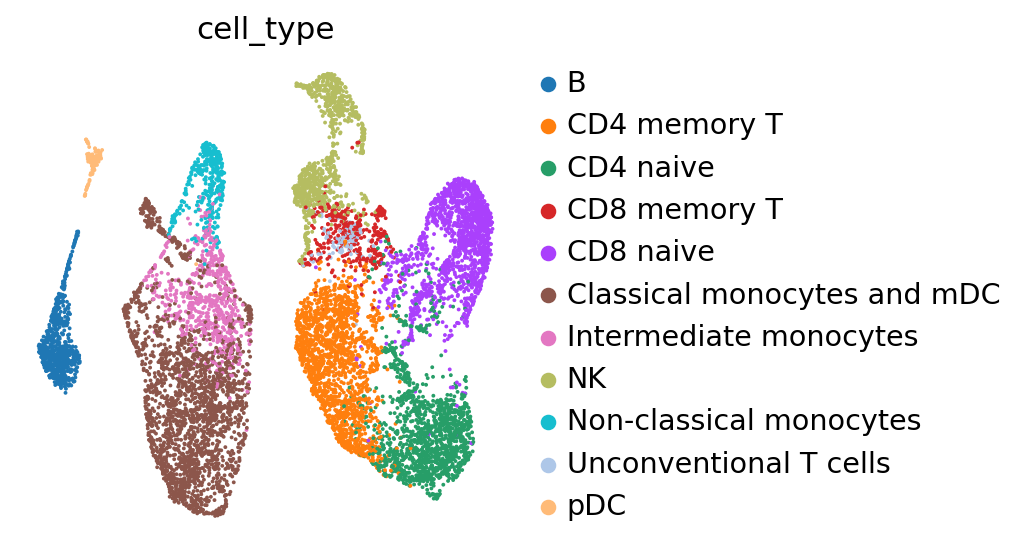

In [11]:
sc.pl.umap(adata, color=['cell_type'], ncols=1, frameon=False, save='_multigrate_10x_multiome.png')

In [12]:
adata.write('multigrate_10x_multiome.h5ad')